![](https://i.loli.net/2018/05/07/5af0400fe9c67.png)

# 机器学习之降维实战：乳腺癌诊断

算法： 
- PCA
- LDA

目录： 
- Step1: 自制分类数据集降维算法对比
- Step2: 手写数字识别降维实战
    - （1）高维数据可视化
    - （2）算法加速
- Step3: 乳腺癌降维实战
- Step4: 总结

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.datasets.samples_generator import make_classification # 生成分类数据
from mpl_toolkits.mplot3d import Axes3D  # 导入三维坐标

%matplotlib inline

## Step1: 自制分类数据集降维算法对比

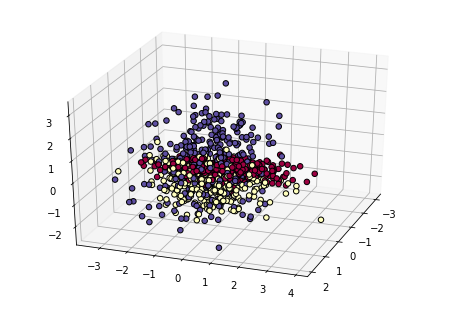

In [2]:
X, y = make_classification(n_samples=1000, n_features=3, n_redundant=0, n_classes=3, n_informative=2,
                           n_clusters_per_class=1, class_sep =0.5, random_state =300)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)  # 生成三维坐标系
ax.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o',c=y, cmap=plt.cm.Spectral, s=30, depthshade=False, edgecolors='black')
plt.show()

### PCA三维降二维

In [5]:
X.shape

(1000, 3)

In [4]:
X_new.shape

(1000, 2)

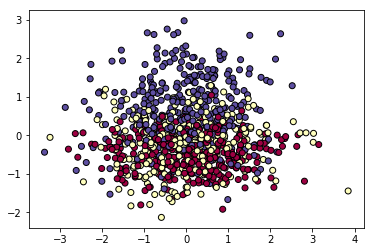

In [3]:
from sklearn.decomposition import PCA  # 导入PCA算法

pca = PCA(n_components=2)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o', c=y, cmap=plt.cm.Spectral, edgecolors='black')
plt.show()

###  LDA三维降二维

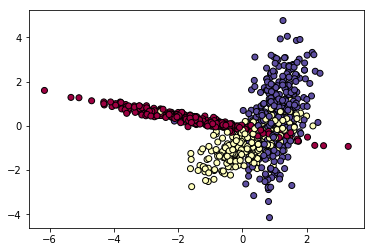

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # 导入LDA算法

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
X_new = lda.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',c=y, cmap=plt.cm.Spectral, edgecolors='black')
plt.show()

## Step2: 手写数字识别降维实战

In [7]:
from process.process import plot_boundary, load_data, create_data
# 数据导入

train_data, valid_data, test_data = load_data()
X_train, y_train, X_valid, y_valid, X_test, y_test = create_data(train_data, valid_data, test_data)

### 高维数据可视化
原先手写数字为28x28=784维的数据，为了可视化，我们将其降到3维

In [8]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_pca = pca.transform(X_train)

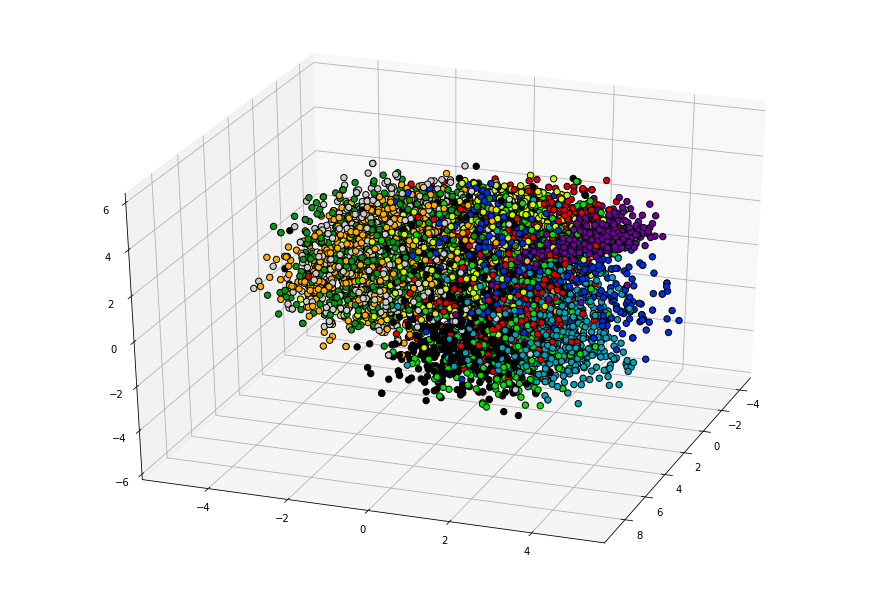

In [9]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 2, 2], elev=30, azim=20)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train, cmap=plt.cm.spectral, s=40, depthshade=False, edgecolors='black')
plt.show()

In [10]:
pca.explained_variance_ratio_ # 显示这三个维度所占的数据方差比例

array([0.09744409, 0.06869984, 0.06188346], dtype=float32)

可以发现，由于丢失的方差过多，在三维空间数字全部纠缠在一起

### 算法加速

In [11]:
X_train, y_train, X_valid, y_valid, X_test, y_test = create_data(train_data, valid_data, test_data)
pca = PCA(n_components=0.99)  #选择保留的方差比例
pca.fit(X_train)
print('保留99%的方差， PCA降维后的维度: ', pca.n_components_)

保留99%的方差， PCA降维后的维度:  326


In [12]:
X_pca = pca.transform(X_train)

将降维后的数据还原（从326维还原成784，对比观察图像变化）

In [13]:
X_inv_pca = pca.inverse_transform(X_pca)

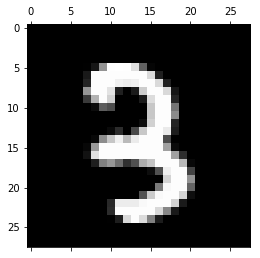

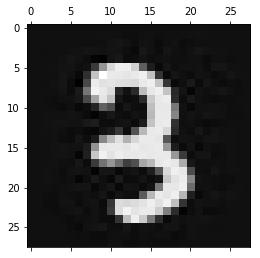

In [14]:
plt.gray()
plt.matshow(X_train[1].reshape(28, 28))
plt.matshow(X_inv_pca[1].reshape(28, 28))
plt.show()

不难发现只丢失了一些冗余的细节信息

In [15]:
%%time
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

Wall time: 24.9 s


tips: 在cell第一行加入魔法命令`%%time`可以显示出本cell的运行时间

In [16]:
print('降维前的准确度为：',np.mean(y_pred == y_test))

降维前的准确度为： 0.922


In [17]:
X_test_pca = pca.transform(X_test)

In [18]:
%%time
svc = SVC(kernel='rbf')
svc.fit(X_pca, y_train)   # 注意这里要用降维后的数据（384）维进行训练而不是还原后的数据

y_pred = svc.predict(X_test_pca)

Wall time: 7.7 s


In [19]:
print('降维后的准确度为：',np.mean(y_pred == y_test))

降维后的准确度为： 0.941


## Step3: 乳腺癌降维实战

In [20]:
from sklearn.datasets import load_breast_cancer
X_train = load_breast_cancer()['data']
y_train = load_breast_cancer()['target']

In [21]:
print(load_breast_cancer()['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [22]:
pca = PCA(n_components=2)
pca.fit(X_train)
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

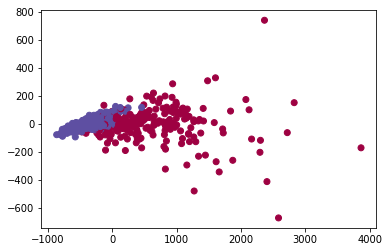

In [23]:
X_pca = pca.transform(X_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.Spectral)

In [24]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [25]:
X_lda = lda.transform(X_train)

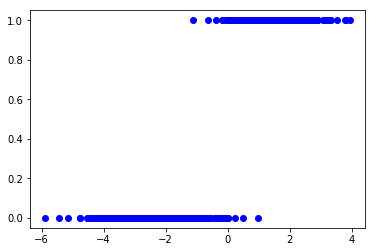

In [26]:
plt.plot(X_lda, y_train, 'bo')
plt.show()

## 总结：
- LDA降维只能用于分类问题，PCA无此限制
- 对于已知标签的数据，LDA的降维效果优于PCA，因为LDA能利用标签的信息，而PCA不行
- LDA只能降到小于N_classes - 1维（N_classes为标签的类别个数），PCA无此限制
- 降维会损失一部分原信息，降得维度越多损失越大
- PCA降维主要用于算法加速或可视化，一般不建议一上来就用PCA，应该先不用PCA然后对比使用PCA后的结果